# Importe Data

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Sleep_health_and_lifestyle_dataset(in).csv to Sleep_health_and_lifestyle_dataset(in) (2).csv
User uploaded file "Sleep_health_and_lifestyle_dataset(in) (2).csv" with length 24139 bytes


In [ ]:
import pandas as pd
df = pd.read_csv('Sleep_health_and_lifestyle_dataset(in) (1).csv')
df.head()


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


# Análisis inicial de los datos

In [ ]:
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


Se busca en los datos aquellos que sean faltantes.

In [ ]:
(df.isnull().mean() * 100).round(2)

,0
Person ID,0.00
Gender,0.00
Age,0.00
Occupation,0.00
Sleep Duration,0.00
Quality of Sleep,0.00
Physical Activity Level,0.00
Stress Level,0.00
BMI Category,0.00
Blood Pressure,0.00


Parece que ninguno tiene datos faltantes a excepción de la variable Sleep Disorder. No obstante, según los proveedores de la data nos indican que aquellos vacíos no es porque no conozcamos la data sino que no hay presencia o evidencia de algún desorden de sueño.

# Tranformaciones iniciales

Se realiza el cambio de vacíos por la nueva marca "No Sleep Disorder"

/tmp/ipython-input-3420184185.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Sleep Disorder'].fillna('No Sleep Disorder', inplace=True)
/tmp/ipython-input-3420184185.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Sleep Disorder', palette='viridis')


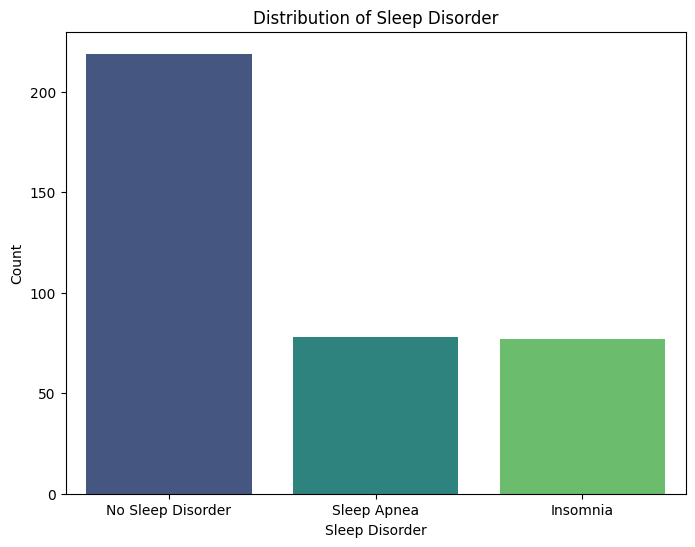

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Transformación de Sleep Disorder
df['Sleep Disorder'].fillna('No Sleep Disorder', inplace=True)

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Sleep Disorder', palette='viridis')
plt.title('Distribution of Sleep Disorder')
plt.xlabel('Sleep Disorder')
plt.ylabel('Count')
plt.show()

Se procesa la columna "Bloos Pressure" para dividir las mediciones Sistolicas y Diastolicas de los datos para poder tener un mejor control de esta categoría.

In [ ]:
# Procesamiento 'Blood Pressure'
df[['Systolic Pressure', 'Diastolic Pressure']] = df['Blood Pressure'].str.split('/', expand=True)
df['Systolic Pressure'] = pd.to_numeric(df['Systolic Pressure'])
df['Diastolic Pressure'] = pd.to_numeric(df['Diastolic Pressure'])

display(df.head())

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Systolic Pressure,Diastolic Pressure
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN,126,83
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN,125,80
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN,125,80
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90


# Análisis de variables con respecto a nuestra variable objetivo Quality of sleep

Variables Categoricas

In [ ]:
# Analisis de las caracteristicas categoricas por Quality of Sleep
for col in ['Gender', 'Occupation', 'BMI Category']:
    print(f'\nDistribución de {col} por Quality of Sleep:')
    display(df.groupby('Quality of Sleep')[col].value_counts().unstack().fillna(0))


Distribución de Gender por Quality of Sleep:


Gender,Female,Male
Quality of Sleep,,
4,2,3
5,4,3
6,37,68
7,37,40
8,36,73
9,69,2



Distribución de Occupation por Quality of Sleep:


Occupation,Accountant,Doctor,Engineer,Lawyer,Manager,Nurse,Sales Representative,Salesperson,Scientist,Software Engineer,Teacher
Quality of Sleep,,,,,,,,,,,
4,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,1.0,0.0
5,0.0,0.0,1.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,2.0
6,0.0,33.0,1.0,0.0,0.0,33.0,0.0,32.0,2.0,1.0,3.0
7,6.0,34.0,1.0,5.0,1.0,1.0,0.0,0.0,0.0,0.0,29.0
8,29.0,0.0,28.0,42.0,0.0,2.0,0.0,0.0,0.0,2.0,6.0
9,2.0,4.0,32.0,0.0,0.0,33.0,0.0,0.0,0.0,0.0,0.0



Distribución de BMI Category por Quality of Sleep:


BMI Category,Normal,Normal Weight,Obese,Overweight
Quality of Sleep,,,,
4,0.0,0.0,3.0,2.0
5,0.0,4.0,0.0,3.0
6,33.0,1.0,1.0,70.0
7,32.0,2.0,4.0,39.0
8,98.0,10.0,0.0,1.0
9,32.0,4.0,2.0,33.0


/tmp/ipython-input-461615397.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Quality of Sleep', y=col, palette='viridis')


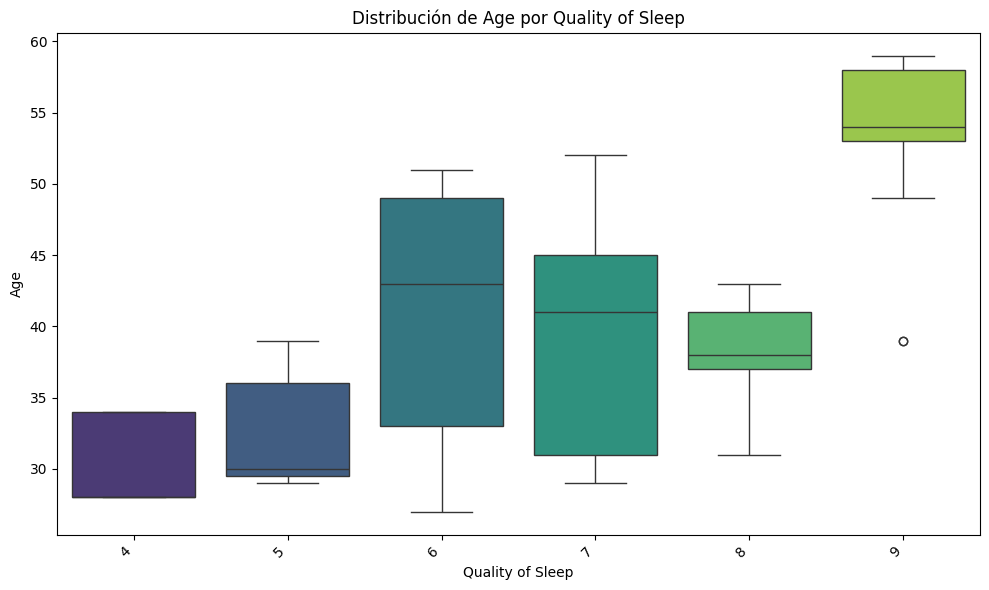

/tmp/ipython-input-461615397.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Quality of Sleep', y=col, palette='viridis')


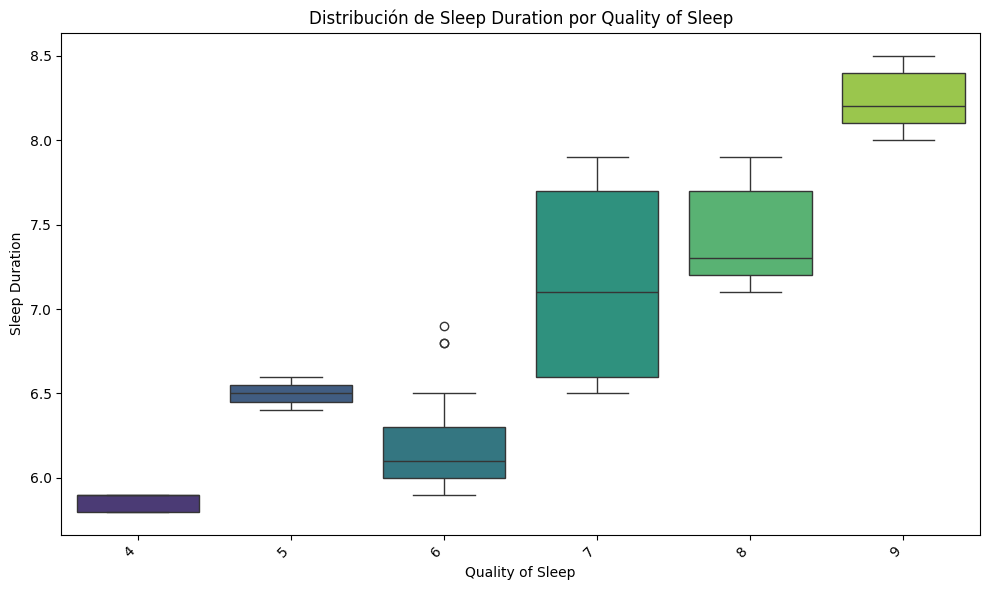

/tmp/ipython-input-461615397.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Quality of Sleep', y=col, palette='viridis')


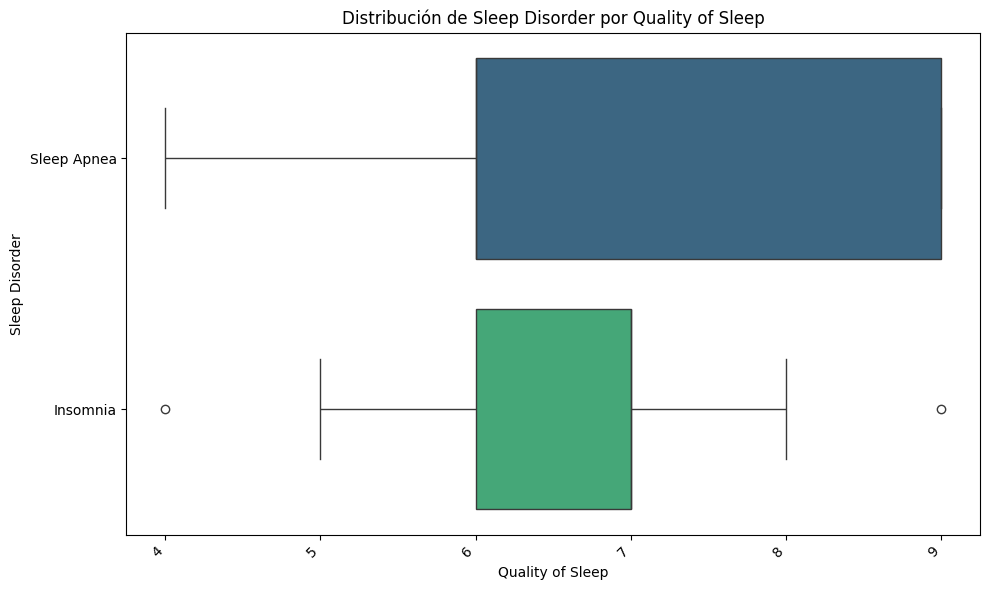

/tmp/ipython-input-461615397.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Quality of Sleep', y=col, palette='viridis')


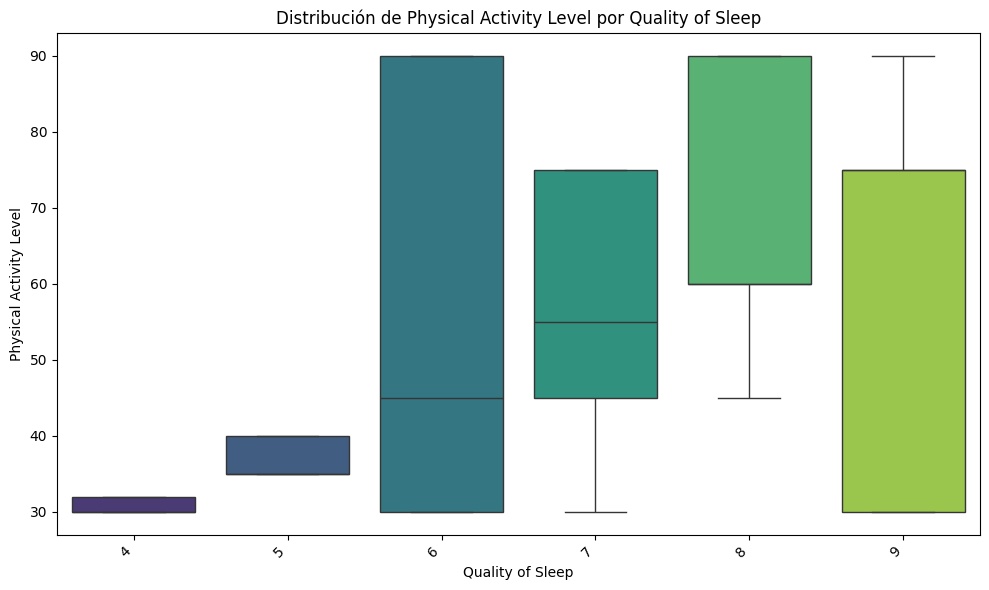

/tmp/ipython-input-461615397.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Quality of Sleep', y=col, palette='viridis')


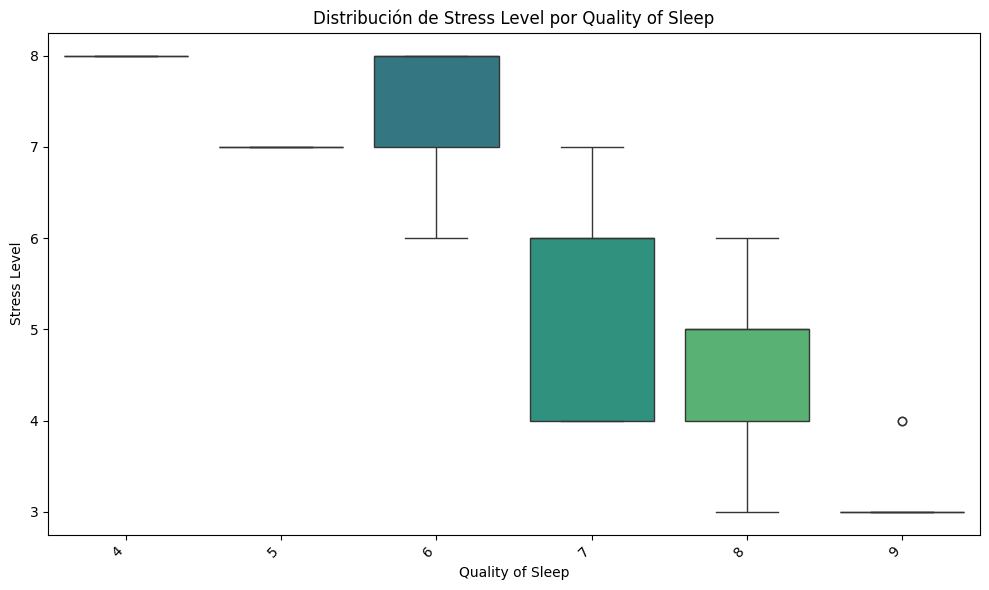

/tmp/ipython-input-461615397.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Quality of Sleep', y=col, palette='viridis')


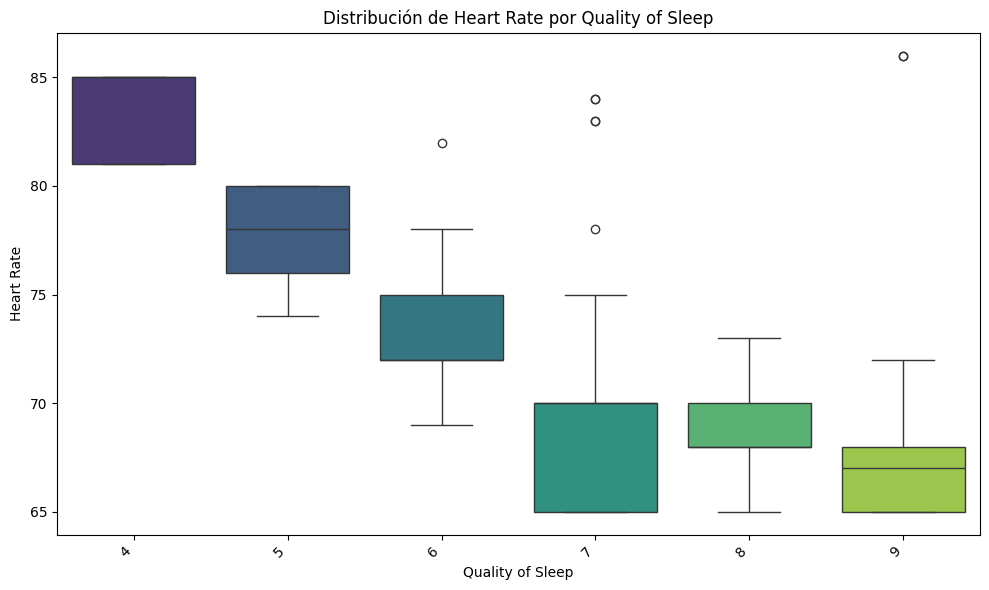

/tmp/ipython-input-461615397.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Quality of Sleep', y=col, palette='viridis')


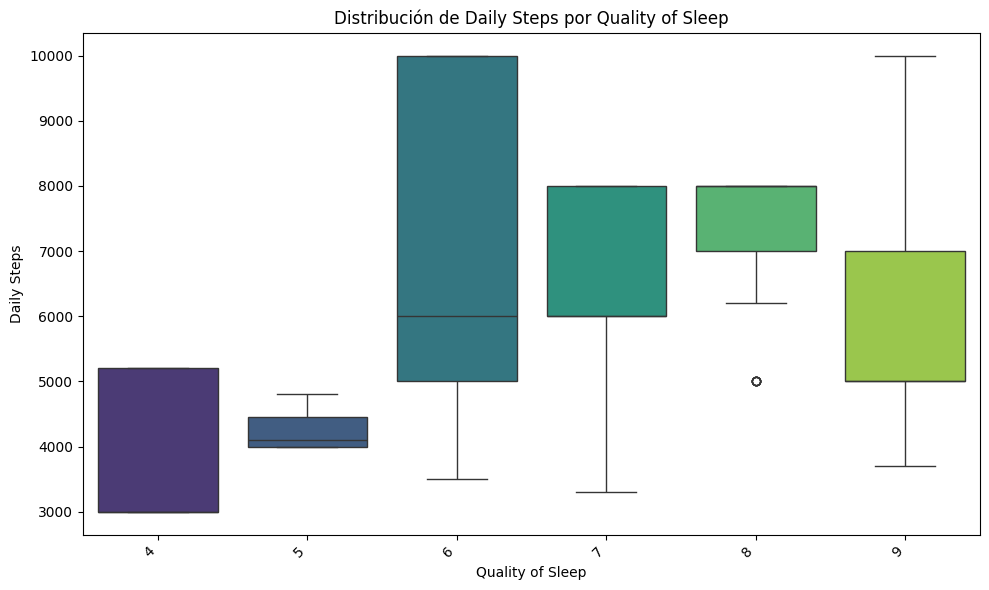

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = ['Age', 'Sleep Duration', 'Sleep Disorder', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps']

for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x='Quality of Sleep', y=col, palette='viridis')
    plt.title(f'Distribución de {col} por Quality of Sleep')
    plt.xlabel('Quality of Sleep')
    plt.ylabel(col)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

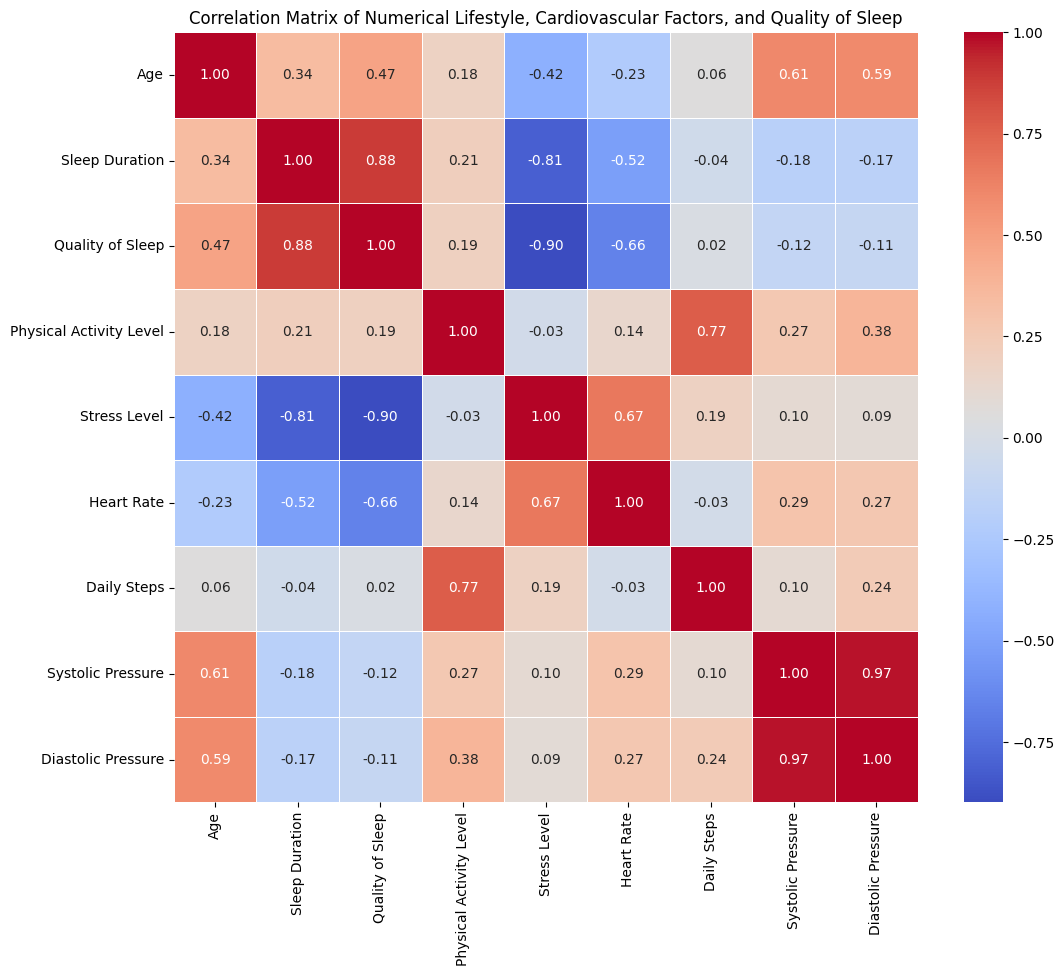

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical columns related to lifestyle factors, Quality of Sleep, and Blood Pressure
numerical_lifestyle_cols = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps', 'Systolic Pressure', 'Diastolic Pressure']

# Calculate the correlation matrix
correlation_matrix = df[numerical_lifestyle_cols].corr()

# Plot the heatmap
plt.figure(figsize=(12, 10)) # Increased figure size to accommodate new columns
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Lifestyle, Cardiovascular Factors, and Quality of Sleep')
plt.show()

Implementación de estadísticas

/tmp/ipython-input-2275944566.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, y='Quality of Sleep', palette='viridis')


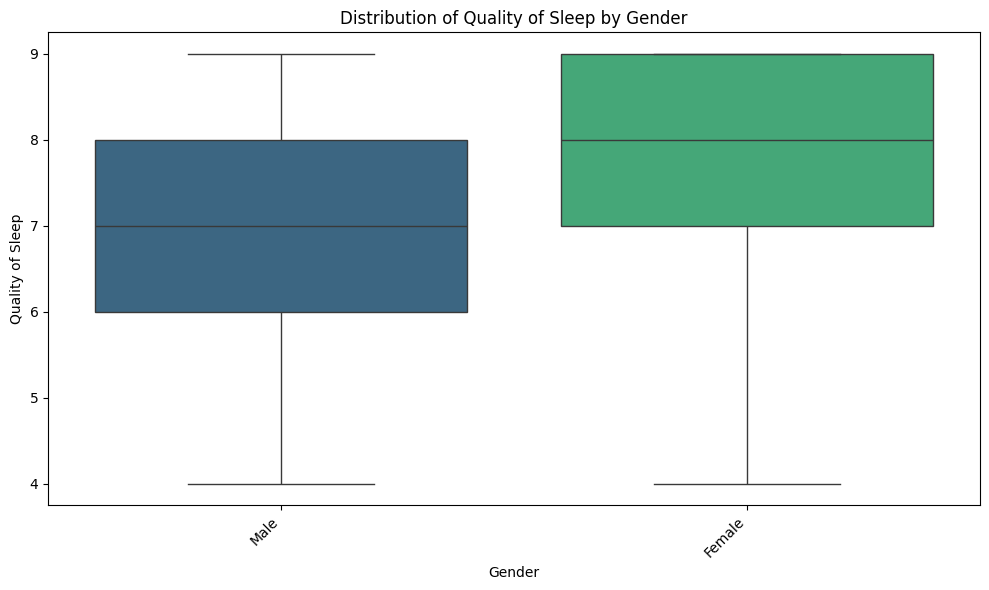


ANOVA test for Quality of Sleep across Gender categories:
F-statistic: 34.5103
P-value: 0.0000
The differences in Quality of Sleep across Gender categories are statistically significant (p < 0.05).


/tmp/ipython-input-2275944566.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, y='Quality of Sleep', palette='viridis')


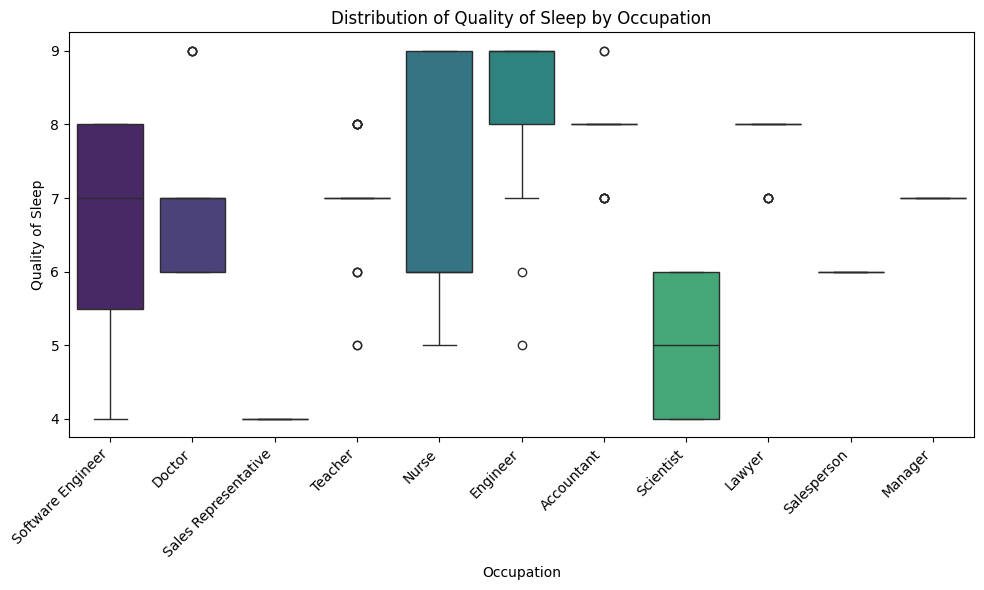


ANOVA test for Quality of Sleep across Occupation categories:
F-statistic: 30.0222
P-value: 0.0000
The differences in Quality of Sleep across Occupation categories are statistically significant (p < 0.05).


/tmp/ipython-input-2275944566.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, y='Quality of Sleep', palette='viridis')


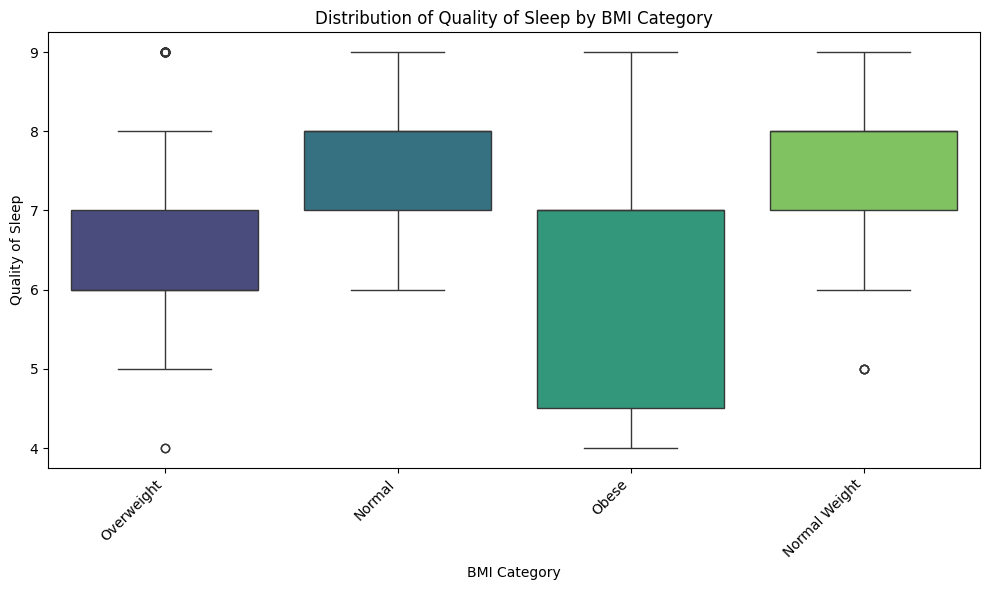


ANOVA test for Quality of Sleep across BMI Category categories:
F-statistic: 14.9325
P-value: 0.0000
The differences in Quality of Sleep across BMI Category categories are statistically significant (p < 0.05).


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

categorical_cols = ['Gender', 'Occupation', 'BMI Category']

for col in categorical_cols:
    # Create box plot
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x=col, y='Quality of Sleep', palette='viridis')
    plt.title(f'Distribution of Quality of Sleep by {col}')
    plt.xlabel(col)
    plt.ylabel('Quality of Sleep')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    # Perform ANOVA test
    print(f'\nANOVA test for Quality of Sleep across {col} categories:')
    # Create a list of data for each category
    data_by_category = [df[df[col] == category]['Quality of Sleep'].dropna() for category in df[col].unique()]

    # Perform one-way ANOVA test
    f_statistic, p_value = stats.f_oneway(*data_by_category)

    print(f'F-statistic: {f_statistic:.4f}')
    print(f'P-value: {p_value:.4f}')

    # Interpret the results
    alpha = 0.05
    if p_value < alpha:
        print(f'The differences in Quality of Sleep across {col} categories are statistically significant (p < {alpha}).')
    else:
        print(f'There is no statistically significant difference in Quality of Sleep across {col} categories (p >= {alpha}).')

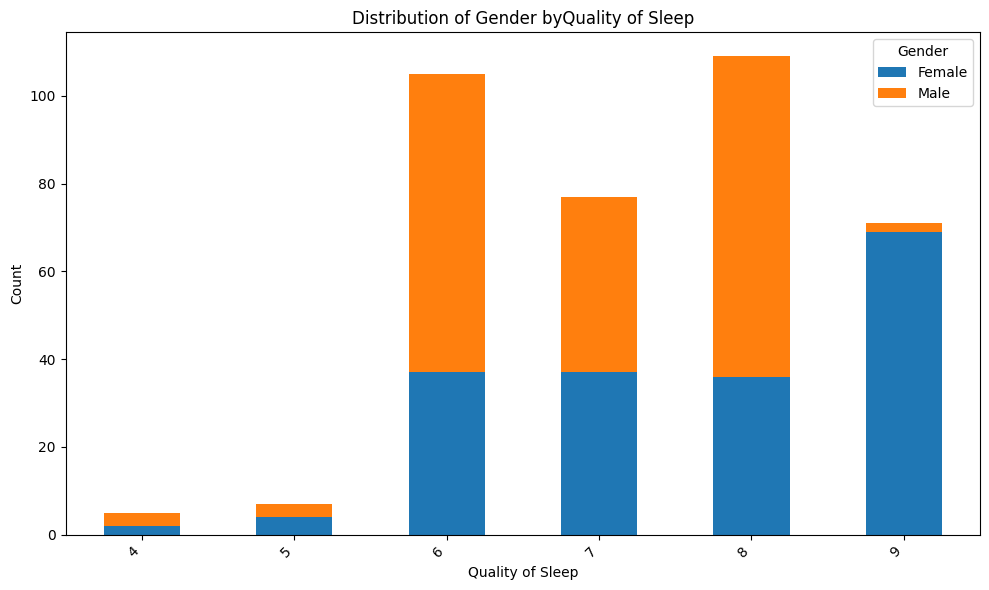

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a cross-tabulation of 'Gender' and 'Quality of Sleep'
gender_sleep_disorder = pd.crosstab(df['Quality of Sleep'], df['Gender'])

# Plot the stacked bar chart
gender_sleep_disorder.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribution of Gender byQuality of Sleep')
plt.xlabel('Quality of Sleep')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

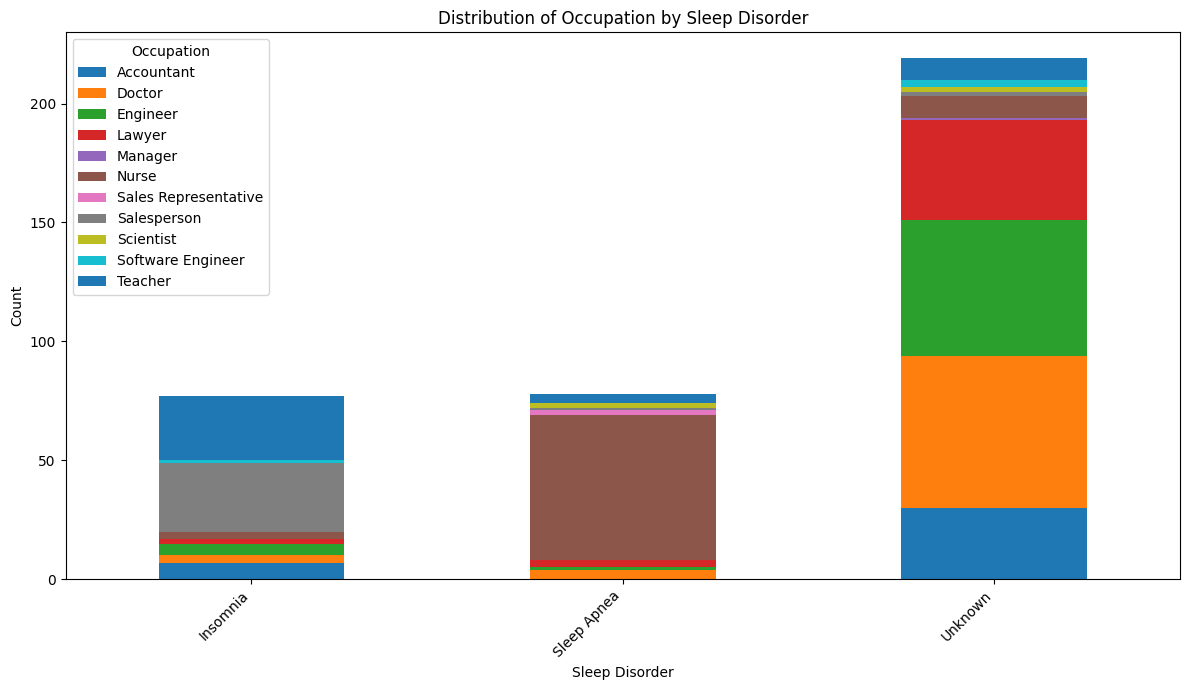

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a cross-tabulation of 'Occupation' and 'Sleep Disorder'
occupation_sleep_disorder = pd.crosstab(df['Sleep Disorder'], df['Occupation'])

# Plot the stacked bar chart
occupation_sleep_disorder.plot(kind='bar', stacked=True, figsize=(12, 7))
plt.title('Distribution of Occupation by Sleep Disorder')
plt.xlabel('Sleep Disorder')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()